In [403]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report
import pickle

In [346]:
data=pd.read_csv("baseball.csv")
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [347]:
data.shape

(30, 17)

In [348]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [349]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [350]:
data=data.rename({'2B':'B2','3B':'B3'},axis=1)
data

,W,R,AB,H,B2,B3,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [351]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
B2     0
B3     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

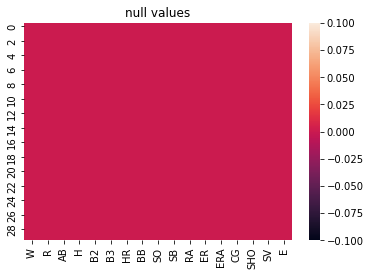

In [352]:
sns.heatmap(data.isnull())
plt.title('null values')
plt.show()

<AxesSubplot:>

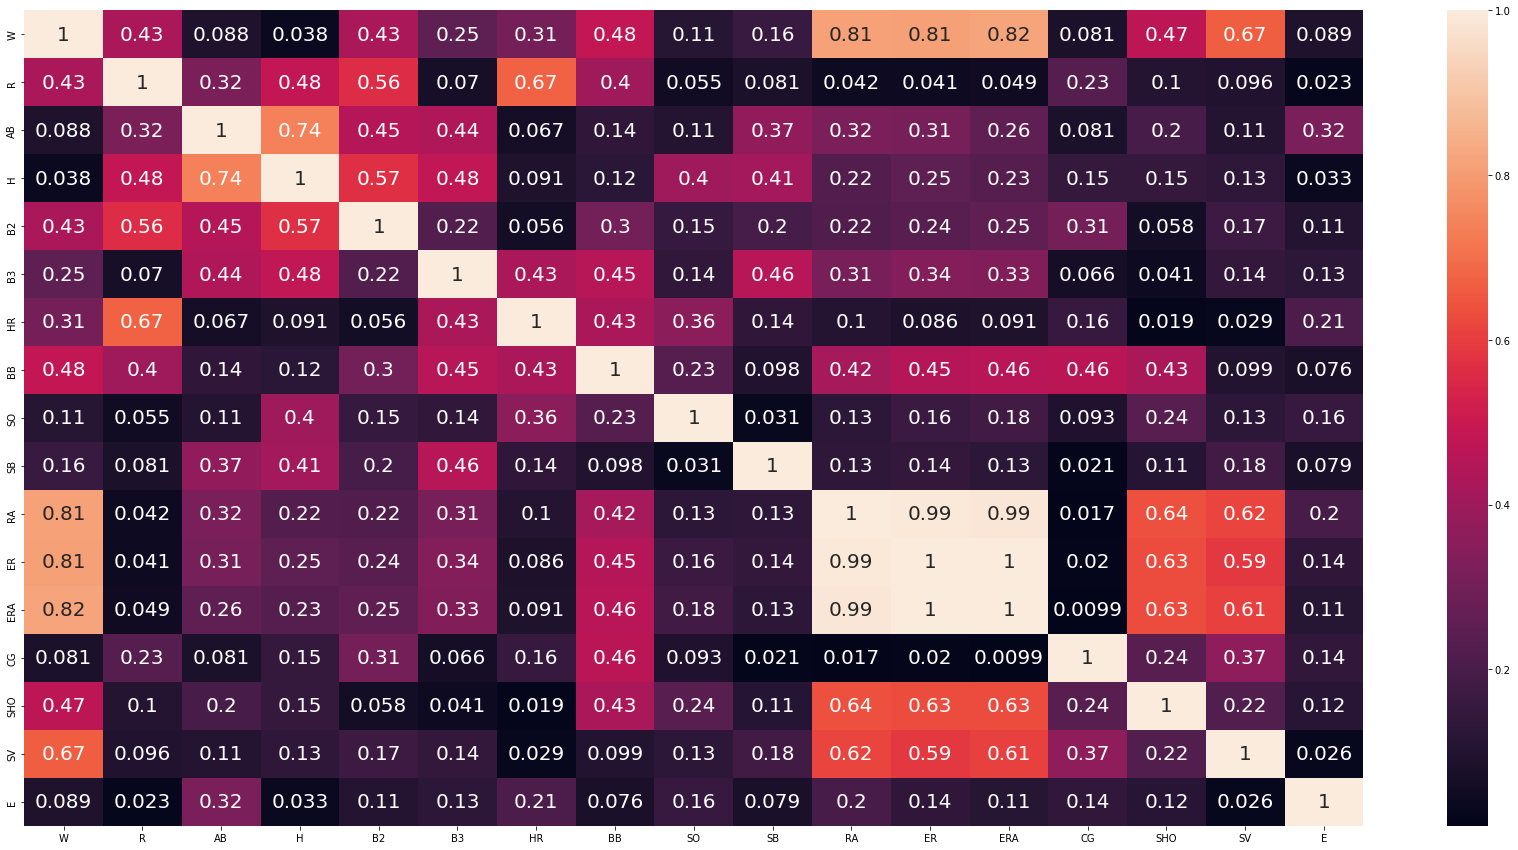

In [382]:
data_corr=data.corr().abs()
plt.figure(figsize=(30,15))
sns.heatmap(data_corr,annot=True,annot_kws={'size':20})

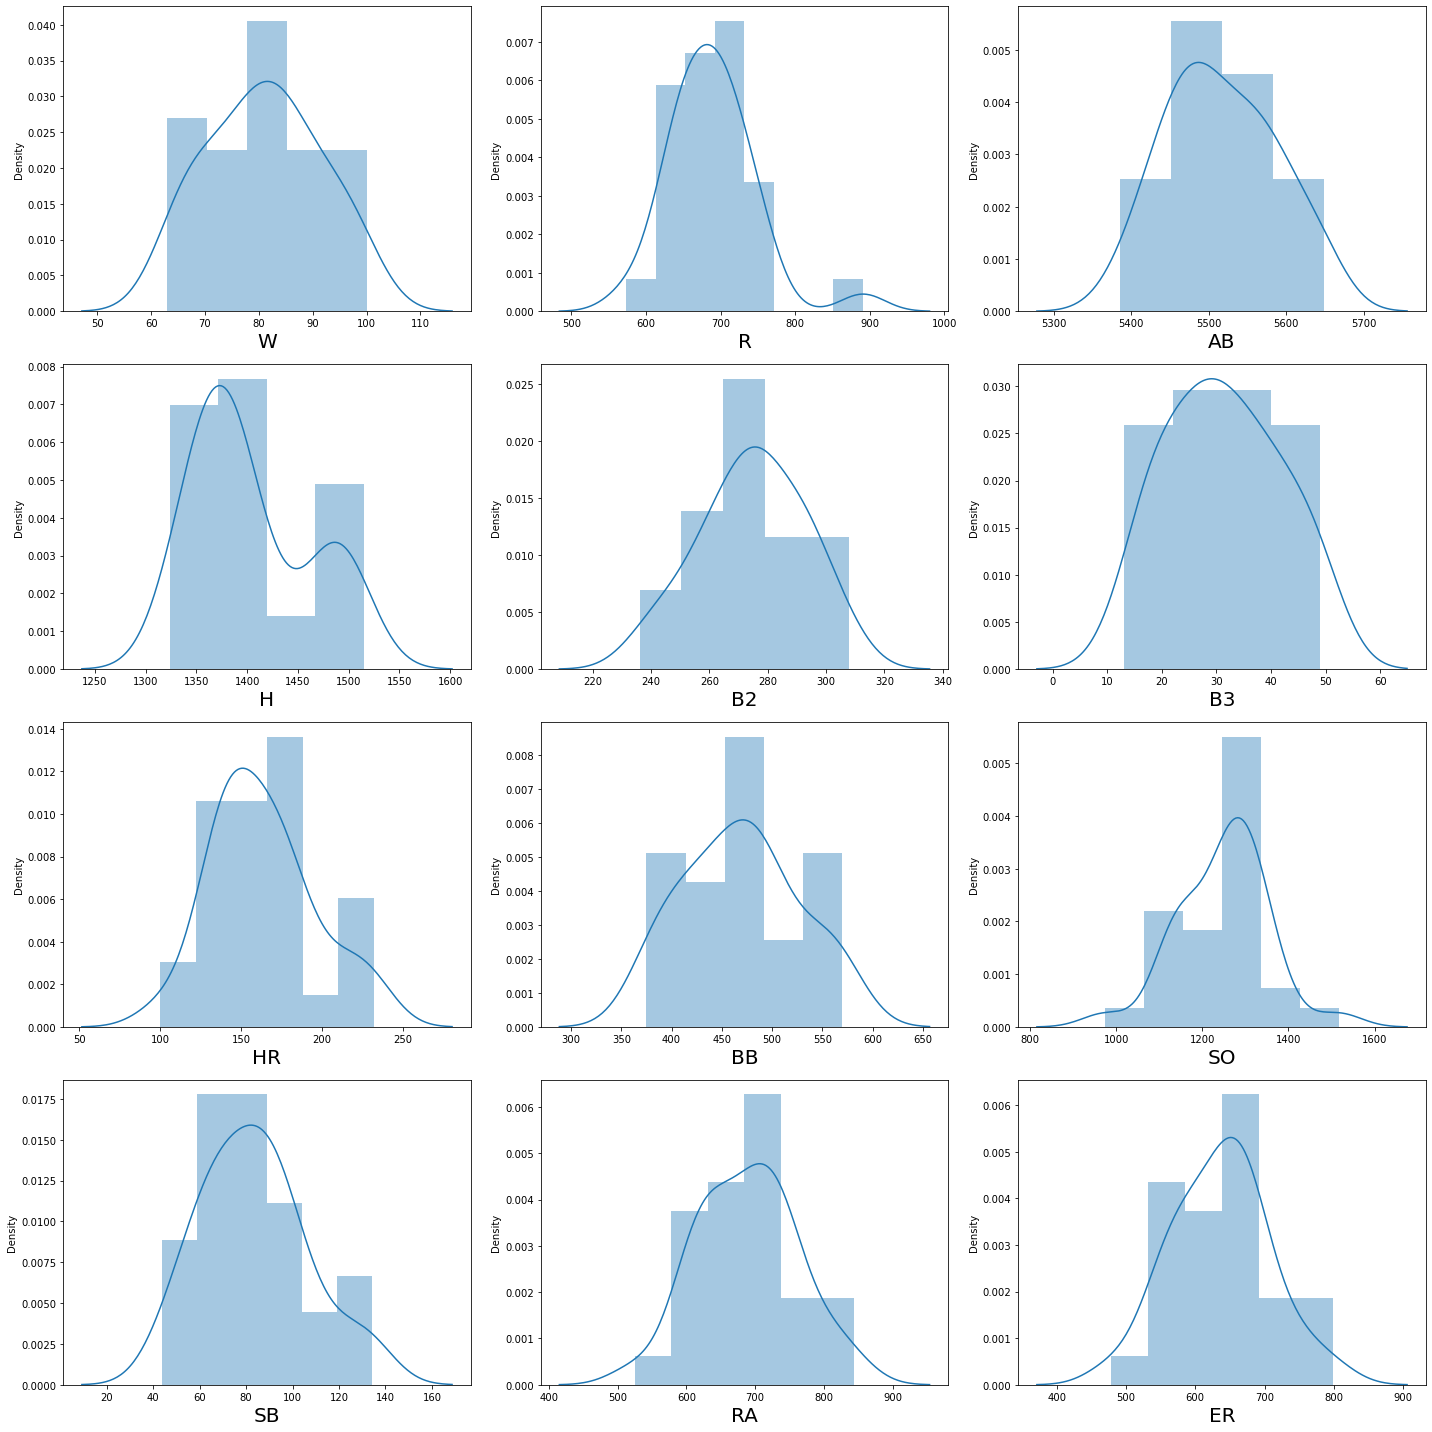

In [353]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [342]:
from sklearn.preprocessing import power_transform

In [360]:
data_new = power_transform(data)

In [361]:
pd.DataFrame(data_new, columns = data.columns).skew().sort_values(ascending = True)

B3    -0.072933
CG    -0.059785
B2    -0.035315
W     -0.027204
SB    -0.010455
RA    -0.008082
BB    -0.007760
ER    -0.001940
HR    -0.000065
R      0.000000
AB     0.000000
H      0.000000
SV     0.000836
ERA    0.001746
SHO    0.006560
SO     0.041170
E      0.063909
dtype: float64

In [362]:
data = pd.DataFrame(data, columns = data.columns)


(18, 17)

In [363]:
data.shape

(30, 17)

In [364]:
X=data.drop('W',axis=1)
y=data.W

In [365]:
X

,R,AB,H,B2,B3,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [366]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

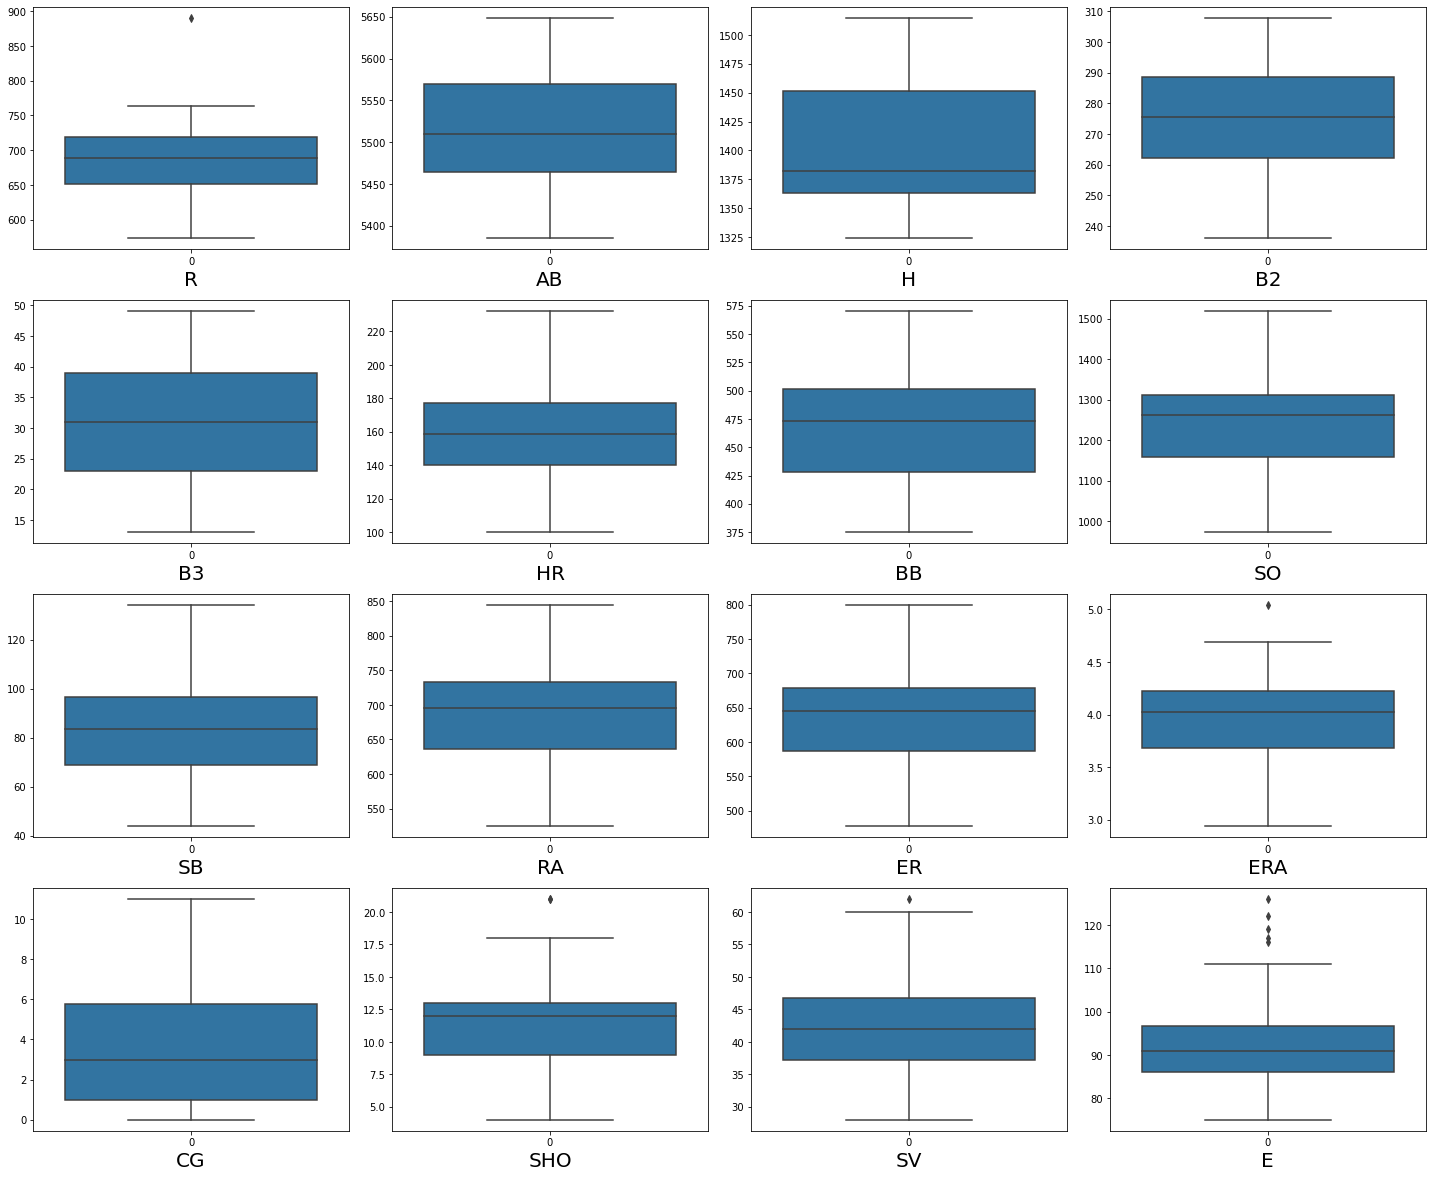

In [370]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in X:
    if plotnumber <= 20:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(data=X[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [371]:
# Validating OUtliers

#1st Quantile
q1 = X.quantile(0.25)

#3rd quantile
q3 = X.quantile(0.75)

#IQR
iqr = q3 - q1
iqr

R       67.0000
AB     106.0000
H       88.5000
B2      26.5000
B3      16.0000
HR      36.7500
BB      73.0000
SO     154.0000
SB      27.5000
RA      96.2500
ER      92.0000
ERA      0.5375
CG       4.7500
SHO      4.0000
SV       9.5000
E       10.7500
dtype: float64

In [372]:
E_high = q3.E + (1.5 * iqr.E)

# Check the Indexes which have higher values

index1 = np.where(X['E']> E_high)

X = X.drop(X['E'].index[index1])

y = y.drop(y.index[index1])

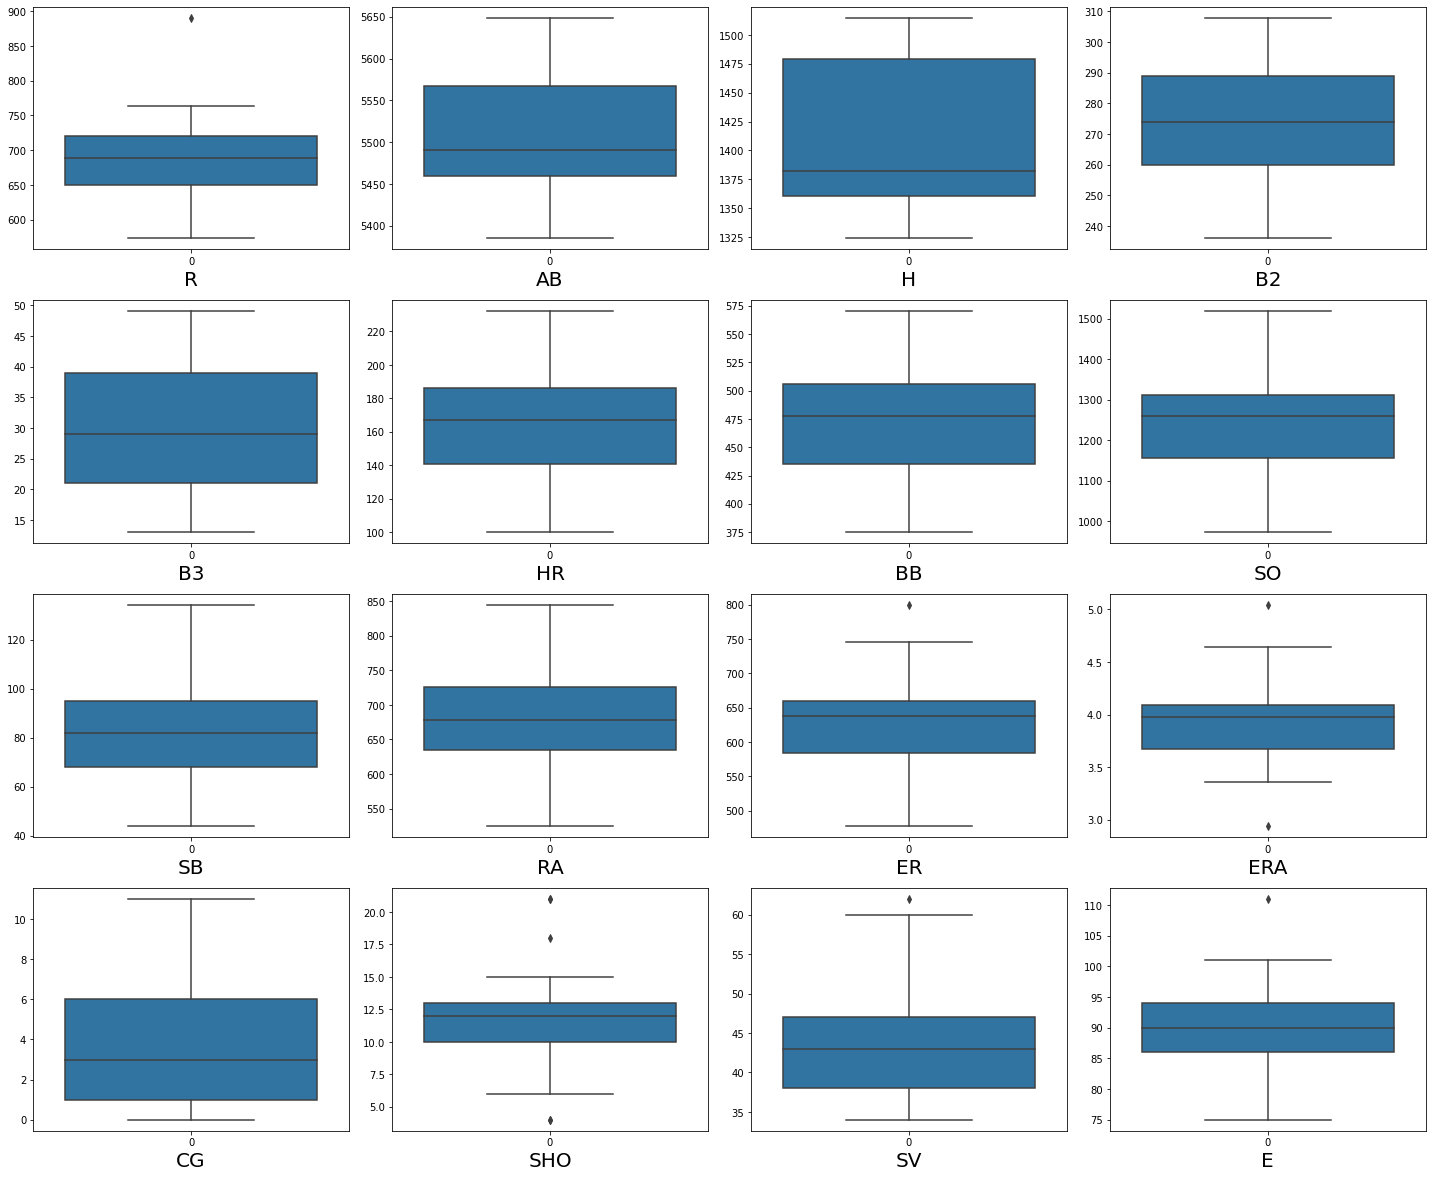

In [373]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in X:
    if plotnumber <= 20:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(data=X[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [384]:
X.shape

(25, 16)

In [385]:
y.shape

(25,)

In [386]:

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [387]:
max_r2_score = 0
maxRS = 0

for i in range(1,397):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)
    r2_score = LR.score(x_test,y_test)
    print('r2_score', r2_score*100,'%', 'random_state', i)
    
    if r2_score > max_r2_score:
        max_r2_score = r2_score
        maxRS = i
        print('r2_score', max_r2_score*100,'%', 'random_state', i)

r2_score -50.509162599549384 % random_state 1
r2_score 61.15603653616358 % random_state 2
r2_score 61.15603653616358 % random_state 2
r2_score -43.27835863946263 % random_state 3
r2_score 37.1343455930197 % random_state 4
r2_score 55.788077725486886 % random_state 5
r2_score -91.66729978248655 % random_state 6
r2_score 39.81502741159725 % random_state 7
r2_score -690.3124337719744 % random_state 8
r2_score -118.16980969672537 % random_state 9
r2_score -155.629546017814 % random_state 10
r2_score -2.4267313918820532 % random_state 11
r2_score 33.293421411974286 % random_state 12
r2_score -349.6517982603546 % random_state 13
r2_score 41.08659253383023 % random_state 14
r2_score -171.65503498751272 % random_state 15
r2_score -123.13794951522085 % random_state 16
r2_score -7.324166441396263 % random_state 17
r2_score 59.66633199729865 % random_state 18
r2_score -46.07184185411726 % random_state 19
r2_score 37.06942716687034 % random_state 20
r2_score 10.254309139526042 % random_state 21
r2

r2_score 67.8927379640506 % random_state 180
r2_score -190.13486063976853 % random_state 181
r2_score 72.58787861584801 % random_state 182
r2_score 86.26271036210869 % random_state 183
r2_score 28.008521015536825 % random_state 184
r2_score -406.2243986265816 % random_state 185
r2_score -243.7799963556067 % random_state 186
r2_score -91.74619972941738 % random_state 187
r2_score -462.93269093642016 % random_state 188
r2_score -281.451519832293 % random_state 189
r2_score 43.73701241850599 % random_state 190
r2_score -141.76005378715345 % random_state 191
r2_score -190.70867826788592 % random_state 192
r2_score -123.9247458083875 % random_state 193
r2_score 51.782161534269314 % random_state 194
r2_score -14.925714455792027 % random_state 195
r2_score -59.687823801475105 % random_state 196
r2_score -41.01491684044396 % random_state 197
r2_score -368.78606633920555 % random_state 198
r2_score -591.6687289546871 % random_state 199
r2_score -1812.621033219807 % random_state 200
r2_score 52.

r2_score -18.16954767700807 % random_state 365
r2_score 67.9251666555295 % random_state 366
r2_score 54.95857024781296 % random_state 367
r2_score -720.9092549235689 % random_state 368
r2_score -590.7095450592461 % random_state 369
r2_score 9.36871805134638 % random_state 370
r2_score -104.25412477744618 % random_state 371
r2_score -241.1818842444975 % random_state 372
r2_score -198.6473058559932 % random_state 373
r2_score 10.479556500277198 % random_state 374
r2_score 54.1074276774082 % random_state 375
r2_score -75.40614002455706 % random_state 376
r2_score 55.16308485301472 % random_state 377
r2_score 74.3971508495969 % random_state 378
r2_score 4.960275161520578 % random_state 379
r2_score -7.767576109115515 % random_state 380
r2_score 32.94520413957881 % random_state 381
r2_score 55.048010865729815 % random_state 382
r2_score 0.8130470242751486 % random_state 383
r2_score -26.61037732072846 % random_state 384
r2_score -2334.1703758595154 % random_state 385
r2_score -157.703891994

In [388]:
print('best accuracy',max_r2_score,'best random state',maxRS)

best accuracy 0.8990034915844323 best random state 284


In [390]:
# data split into train and test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=284)

In [396]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [397]:
reg.score(x_test, y_test)

0.8990034915843386

In [398]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))

print("Square Root of Mean Square Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))

print("The Model Testing Accuracy is: ", r2_score(y_test, y_pred))

Mean Absolute Error:  3.0231354018483216
Mean Squared Error:  14.832058664471418
Square Root of Mean Square Error:  3.8512411849261556
The Model Testing Accuracy is:  0.8990034915843386


In [404]:
kan = KNeighborsRegressor()
kan.fit(x_train, y_train)
y_pred = kan.predict(x_test)

In [405]:
kan.score(x_test, y_test)

0.260272373540856

In [406]:
ran =  RandomForestRegressor()
ran.fit(x_train, y_train)
y_pred = ran.predict(x_test)

In [407]:
ran.score(x_test, y_test)

0.5130128404669261

In [411]:
dt =  DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [412]:
dt.score(x_test, y_test)

0.4503891050583657

In [414]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [415]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [416]:
alpha=lasscv.alpha_
alpha

0.1638624619392819

In [417]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.1638624619392819)

In [418]:
lasso_reg.score(x_test,y_test)

0.7693317095630233

In [420]:
param_grid = {'copy_X': [True,False],
              'fit_intercept': [True,False],
              'normalize': [True,False]}

grd = GridSearchCV(lif, param_grid = param_grid)
grd.fit(x_train, y_train)

print("Best parameters: ", grd.best_params_)

lif = grd.best_estimator_

lif.fit(x_train, y_train)

y_pred = lif.predict(x_test)

print('R2 Score: ', lif.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Best parameters:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}
R2 Score:  0.7794581042675983
Mean Squared Error:  32.38815268755841
